<a href="https://colab.research.google.com/github/SimpleVlad/FirstAutoEncoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))


In [0]:


def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [0]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2565 - acc: 0.7862 - val_loss: 0.1715 - val_acc: 0.8024
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1534 - acc: 0.8057 - val_loss: 0.1364 - val_acc: 0.8080
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1275 - acc: 0.8100 - val_loss: 0.1174 - val_acc: 0.8107
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1126 - acc: 0.8121 - val_loss: 0.1055 - val_acc: 0.8121
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1020 - acc: 0.8134 - val_loss: 0.0966 - val_acc: 0.8129
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0947 - acc: 0.8141 - val_loss: 0.0909 - val_acc: 0.8135
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0896 - acc: 0.8145 - val_loss: 0.0868 - val_acc

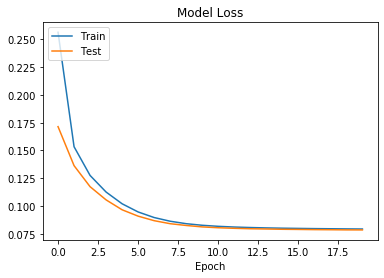

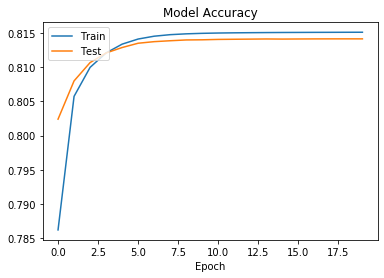

In [0]:
history = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:


def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [0]:
n = 15

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 7.82326  ,  7.5276904,  7.049113 ,  5.4040413,  2.5032654,
        4.8604727,  2.0882227,  8.04005  ,  0.       ,  9.927458 ,
        6.4740176,  3.1474864, 10.479736 ,  3.8162591,  3.6038134,
        4.221431 ,  8.108921 ,  3.2652998,  5.9277644,  6.8250365,
       14.898331 ,  6.813281 ,  6.0613112,  4.1392026,  1.6718955,
       15.285622 ,  4.928713 ,  9.958403 ,  3.7620919,  4.2720485,
        2.954205 ,  6.9744344,  7.9026394,  8.476259 ,  8.417731 ,
        3.412515 ,  1.854346 ,  5.8228207,  4.3220387,  5.5243673,
        7.86445  , 10.807779 ,  5.840442 ,  3.1204467,  9.701189 ,
        2.9984894,  5.684353 ,  7.655411 ,  4.2230473], dtype=float32)

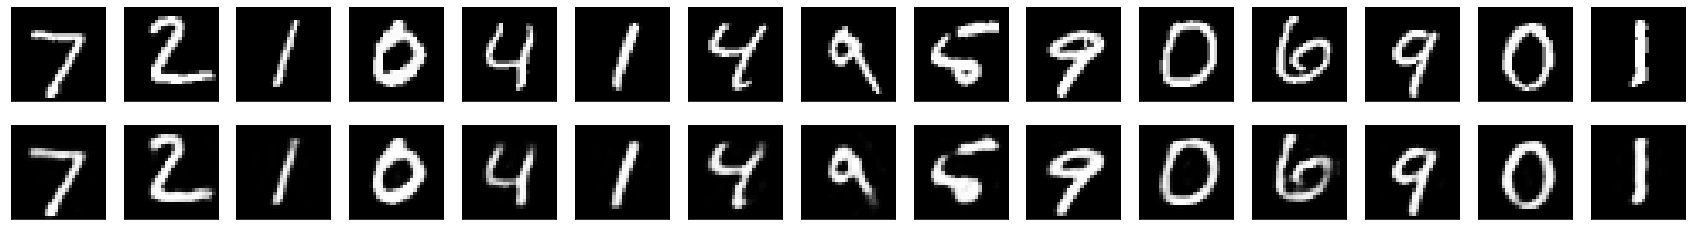

In [0]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)